In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [4]:
(x_test, y_test), (x_train, y_train)=keras.datasets.mnist.load_data()

x_train=x_train.reshape(-1,28,28,1)/255
x_test=x_test.reshape(-1,28,28,1)/255

y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [6]:
datagen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

In [15]:
cnn= models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
                  
])

cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()
cnn_history=cnn.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=5, validation_data=(x_test, y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 163ms/step - accuracy: 0.7070 - loss: 0.8996 - val_accuracy: 0.9392 - val_loss: 0.2130
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.9075 - loss: 0.2987 - val_accuracy: 0.9582 - val_loss: 0.1505
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.9340 - loss: 0.2106 - val_accuracy: 0.9672 - val_loss: 0.1105
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 38s 176ms/step - accuracy: 0.9419 - loss: 0.1875 - val_accuracy: 0.9704 - val_loss: 0.0988
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 149ms/step - accuracy: 0.9560 - loss: 0.1422 - val_accuracy: 0.9729 - val_loss: 0.0910


In [16]:
mlp= models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy']
           )

mlp_history=mlp.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8561 - loss: 0.5030 - val_accuracy: 0.9138 - val_loss: 0.2917
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.9454 - loss: 0.1867 - val_accuracy: 0.9277 - val_loss: 0.2452
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9646 - loss: 0.1164 - val_accuracy: 0.9366 - val_loss: 0.2117
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - accuracy: 0.9736 - loss: 0.0796 - val_accuracy: 0.9494 - val_loss: 0.1708
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9866 - loss: 0.0484 - val_accuracy: 0.9478 - val_loss: 0.1797


In [17]:
cnn_loss, cnn_acc=cnn.evaluate(x_test, y_test)
mlp_loss, mlp_acc=mlp.evaluate(x_test, y_test)

print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"MLP Accuracy: {mlp_acc:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9729 - loss: 0.0910
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9478 - loss: 0.1797
CNN Accuracy: 0.9729
MLP Accuracy: 0.9478


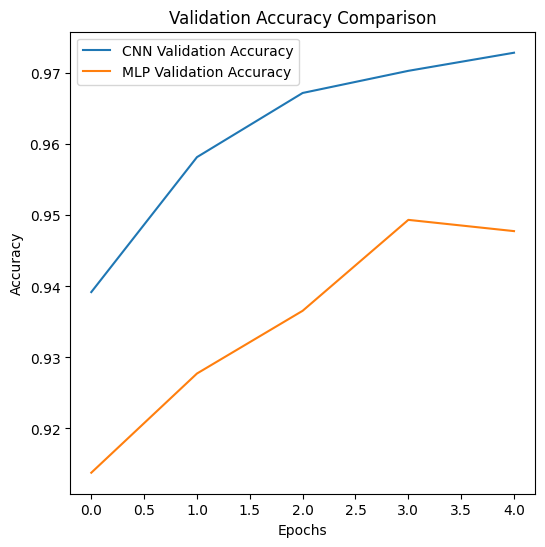

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='MLP Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()